<h2> Ćwiczenia 7 - Kalkulator pól </h2>

Jednym z przydatnych narzędzi GIS jest kalkulator pól. Pozwala on na obliczanie wartości w wierszach na podstawie wartości z pozostałych kolumn lub atrybutów warstwy.



Najpierw spójrzmy jak działa kalkulator pól w QGIS:

Na początku wczytujemy warstwę i otwieramy tabelę atrybutów. Dla przykładu otworzymy warstwę strefy_ABC_lotnisko (folder Kolokwium2 -> Kolokwium2_poprawa)

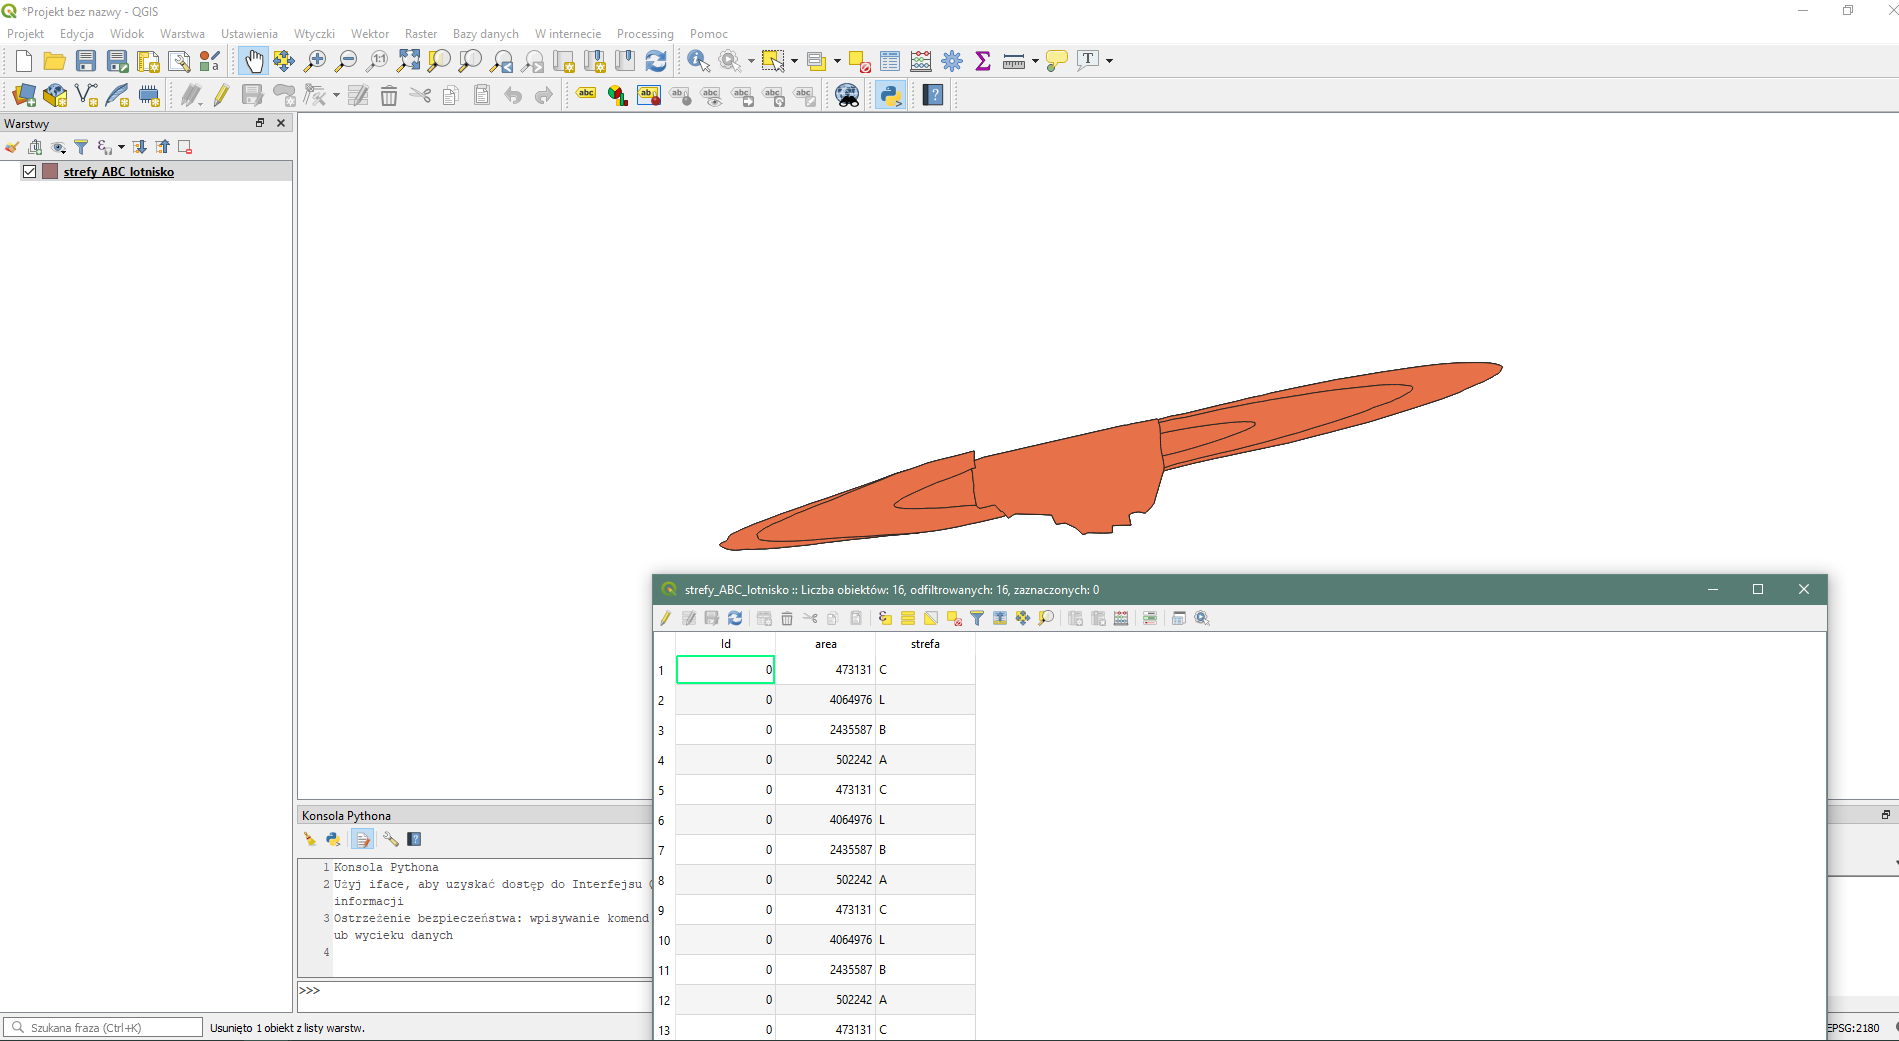

In [3]:
from IPython.display import Image
Image("1.png", width=600)

Następnie otwieramy "Kalkulator pól"

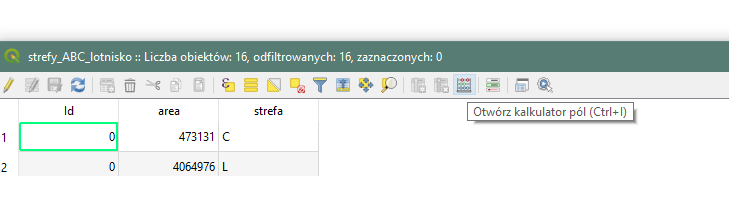

In [4]:
Image("2.png", width=600)

W nowym oknie możemy ustalić kilka parametrów:

    Dodanie nowego pola czy akutalizacja już istniejącego
    
    Jeśli dodanie nowego pola -> typ danej i jej długość (liczba znaków) i w przypadku liczby zmiennoprzecinkowej liczba miejsc po przecinku

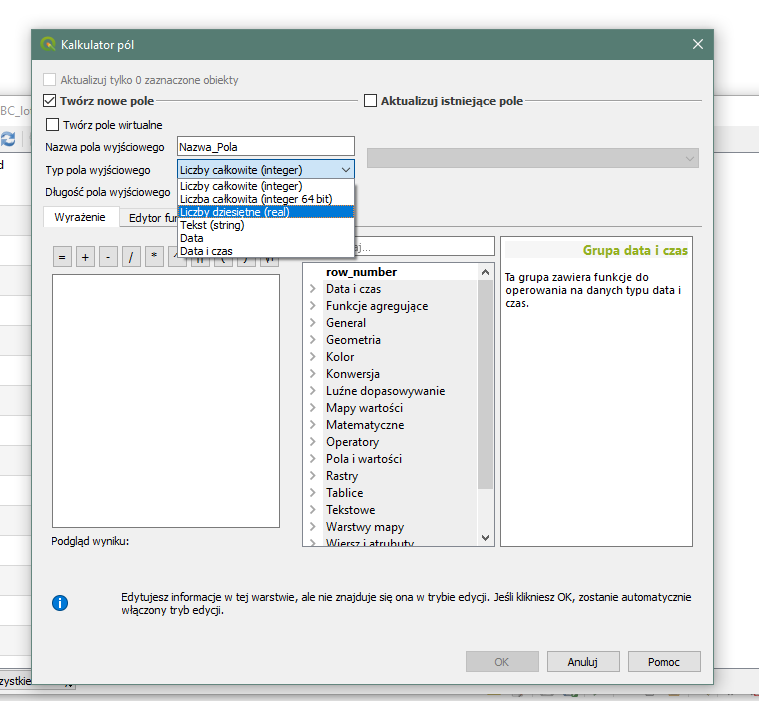

In [5]:
Image("3.png", width=600)

Poniżej znajdują się trzy okna. Idąc od lewej:

    Pole wyrażenia -> tu wpisuje się funkcję, która zostanie wywowała
    
    Pole funkcji -> stąd można wyszukać funkcje które możemu użyć, w tym nazwy pól, operatory geometryczne itd.
    
    Pole podpowiedzi -> krótki opis funkcji wybranej w polu funkcji.
    
    
Wpiszmy funkcję, która podzieli pole "area" przez 1000. Wynik zapisywany jest do nowego pola.

Poniżej widać, że w podpowiedziach "Pola i wartości" widzimy nazwy dostępnych pól

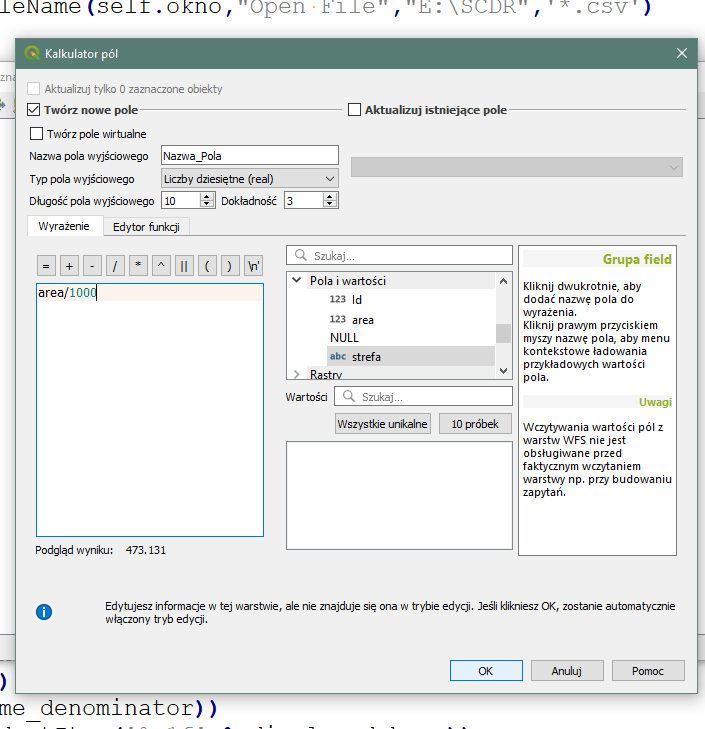

In [6]:
Image("4.png", width=600)

Po wybraniu "OK" funkcja wykonuje się i dodaje nowe pole z obliczonymi wartościami do tabeli atrybutów warstwy.

Tryb edycji włącza się automatycznie, można go wyłączyć i zapisać stan.

GOTOWE!

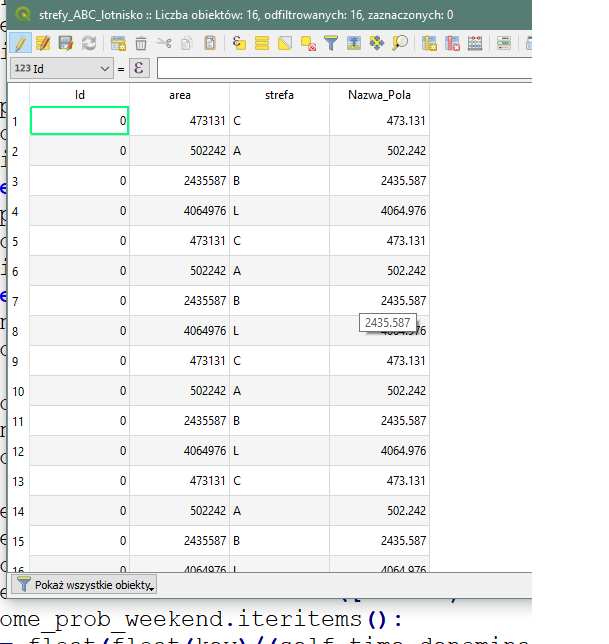

In [7]:
Image("5.png", width=600)

Można również korzystać z operatorów geometrycznych, np.

pole -> $area

długość -> $length

Więcej operatorów znajdziemy w oknie funkcji

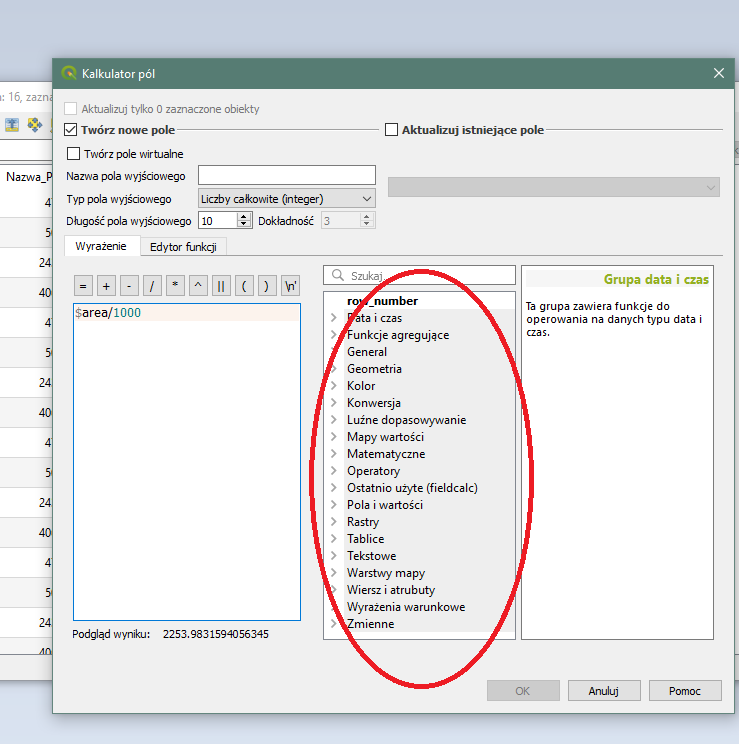

In [8]:
Image("6.png", width=600)

<h3> Ok, teraz zróbmy to samo za pomocą Pythona! </h3>

Najpierw podczytamy sobie warstwę, załóżmy że mamy ją już w QGIS, więc odwołujemy się przez iface

In [ ]:
warstwa = iface.activeLayer()

Następnie dostajemy się do dataProvider żeby móc dodać nowe pole:

In [ ]:
pr = warstwa.dataProvider()

Dodajemy nowe pole, zupełnie jak powyżej:

In [ ]:
pr.addAttributes([QgsField("Nazwa",QVariant.Double)])
warstwa.updateFields() #pamiętamy o odświeżaniu!

Teraz dla każdego obiektu, możemy ustalić nową wartość utworzonego pola przy pomocy pozostałych pól:

In [ ]:
for obiekt in warstwa.getFeatures(): #iterujemy się przez obiekty
    obiekt.setAttribute(obiekt.fieldNameIndex('Nazwa'),obiekt['area']/1000) 
    """powyżej się sporo dzieje - 
    dla obiektu w iteracji ustalamy wartość atrybutu metodą setAttribute
    metoda jako argument nr 1) przyjmuje współrżed
    warstwa.updateFeature(obiekt)